# Анализ данных по COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("covid_19_data.csv")
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
data.shape

(156292, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


In [5]:
data.columns  # в columns хранится вектор со спец класса index в котором нах-ся названия ключей для проверки на АРТЕФАКТЫ

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
# удаление ненужных столбцов по ключам
data = data.drop(['SNo', 'Last Update'], axis=1)  # axis=1 это слобец, по умолчанию равен 0
# data = data.drop(['SNo', 'Last Update'], axis=1, inplace=True)
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [7]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [8]:
# проверка на дубликаты
data.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()  # в каких строках дубликаты? использовать маскирование 

4

In [9]:
# удаление дубликатов
data = data.drop_duplicates(['ObservationDate', 'Province/State', 'Country/Region'])

In [10]:
data.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()

0

In [11]:
# изучаем страны
country_list = data['Country/Region'].unique()

for country in np.sort(country_list):
    print(country)

 Azerbaijan
('St. Martin',)
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Guiana
Gabon
Gambia
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaic

In [12]:
# смотрим на Others регион   МАСКИРОВАНИЕ 
data[data['Country/Region'] == 'Others']

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
933,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1005,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1077,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1143,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1215,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1286,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1359,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1433,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1506,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1578,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [13]:
data.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [14]:
data['ObservationDate']

0         01/22/2020
1         01/22/2020
2         01/22/2020
3         01/22/2020
4         01/22/2020
             ...    
156287    11/15/2020
156288    11/15/2020
156289    11/15/2020
156290    11/15/2020
156291    11/15/2020
Name: ObservationDate, Length: 156288, dtype: object

In [15]:
# date_str ='11/15/2020'
# pd.to_datetime(date_str).date()

In [16]:
# конвертация временных данных в тип 

data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['ObservationDate']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
156287   2020-11-15
156288   2020-11-15
156289   2020-11-15
156290   2020-11-15
156291   2020-11-15
Name: ObservationDate, Length: 156288, dtype: datetime64[ns]

In [17]:
# data['ObservationDate'][0] # [0]  обращение к нулевому индексу

In [18]:
# извлечение из TimeStamp даты

data['Date'] = data['ObservationDate'].apply(lambda element: element.date())

In [19]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22


In [20]:
# группировка данных по дате и вывод суммарного значения по миру
df_by_date = data.groupby(['Date']).sum().reset_index()
df_by_date

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
...,...,...,...,...
294,2020-11-11,52126793.0,1284472.0,33926351.0
295,2020-11-12,52740580.0,1293954.0,34149223.0
296,2020-11-13,53365400.0,1302556.0,34450332.0
297,2020-11-14,53927158.0,1311192.0,34726418.0


In [41]:
# статистика по странам и дате, сформировання через суммирование
df_by_country = data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum()
# df_by_country.loc[:, df_by_country.loc[:, 'Country/Region'] == 'Russia']

In [54]:
# данные максимумов по странам
df_max = df_by_country.groupby(['Country/Region']).max()
df_max

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,43240.0,1617.0,35092.0
Albania,27830.0,623.0,12889.0
Algeria,67679.0,2154.0,44633.0
...,...,...,...
Western Sahara,10.0,1.0,8.0
Yemen,2072.0,605.0,1394.0
Zambia,17123.0,353.0,16137.0


In [55]:
# выбираем страну или страны
df_max.loc['Russia', :]

Confirmed    1910149.0
Deaths         32885.0
Recovered    1429565.0
Name: Russia, dtype: float64

In [56]:
df_max.loc[('Russia', 'US', 'Afghanistan'), :]

,Confirmed,Deaths,Recovered
Country/Region,,,
Russia,1910149.0,32885.0,1429565.0
US,11036935.0,246214.0,4174884.0
Afghanistan,43240.0,1617.0,35092.0


In [65]:
# сортировка данных по значениям столбцов
df_max.sort_values(by='Confirmed', ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,11036935.0,246214.0,4174884.0
India,8845127.0,130070.0,8249579.0
Brazil,5863093.0,165798.0,5279452.0
France,1915713.0,42601.0,139760.0
Russia,1910149.0,32885.0,1429565.0
...,...,...,...
The Gambia,1.0,0.0,0.0
The Bahamas,1.0,0.0,0.0
North Ireland,1.0,0.0,0.0


In [66]:
# пример сортировки по индексам или ключам
# df_max.sort_index(axis=1, ascending=False)

# Визуализация

In [68]:
# динамика пандемии по миру

# вызываем датафрейм по всему миру отсортированный по датам
df_by_date

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
...,...,...,...,...
294,2020-11-11,52126793.0,1284472.0,33926351.0
295,2020-11-12,52740580.0,1293954.0,34149223.0
296,2020-11-13,53365400.0,1302556.0,34450332.0
297,2020-11-14,53927158.0,1311192.0,34726418.0


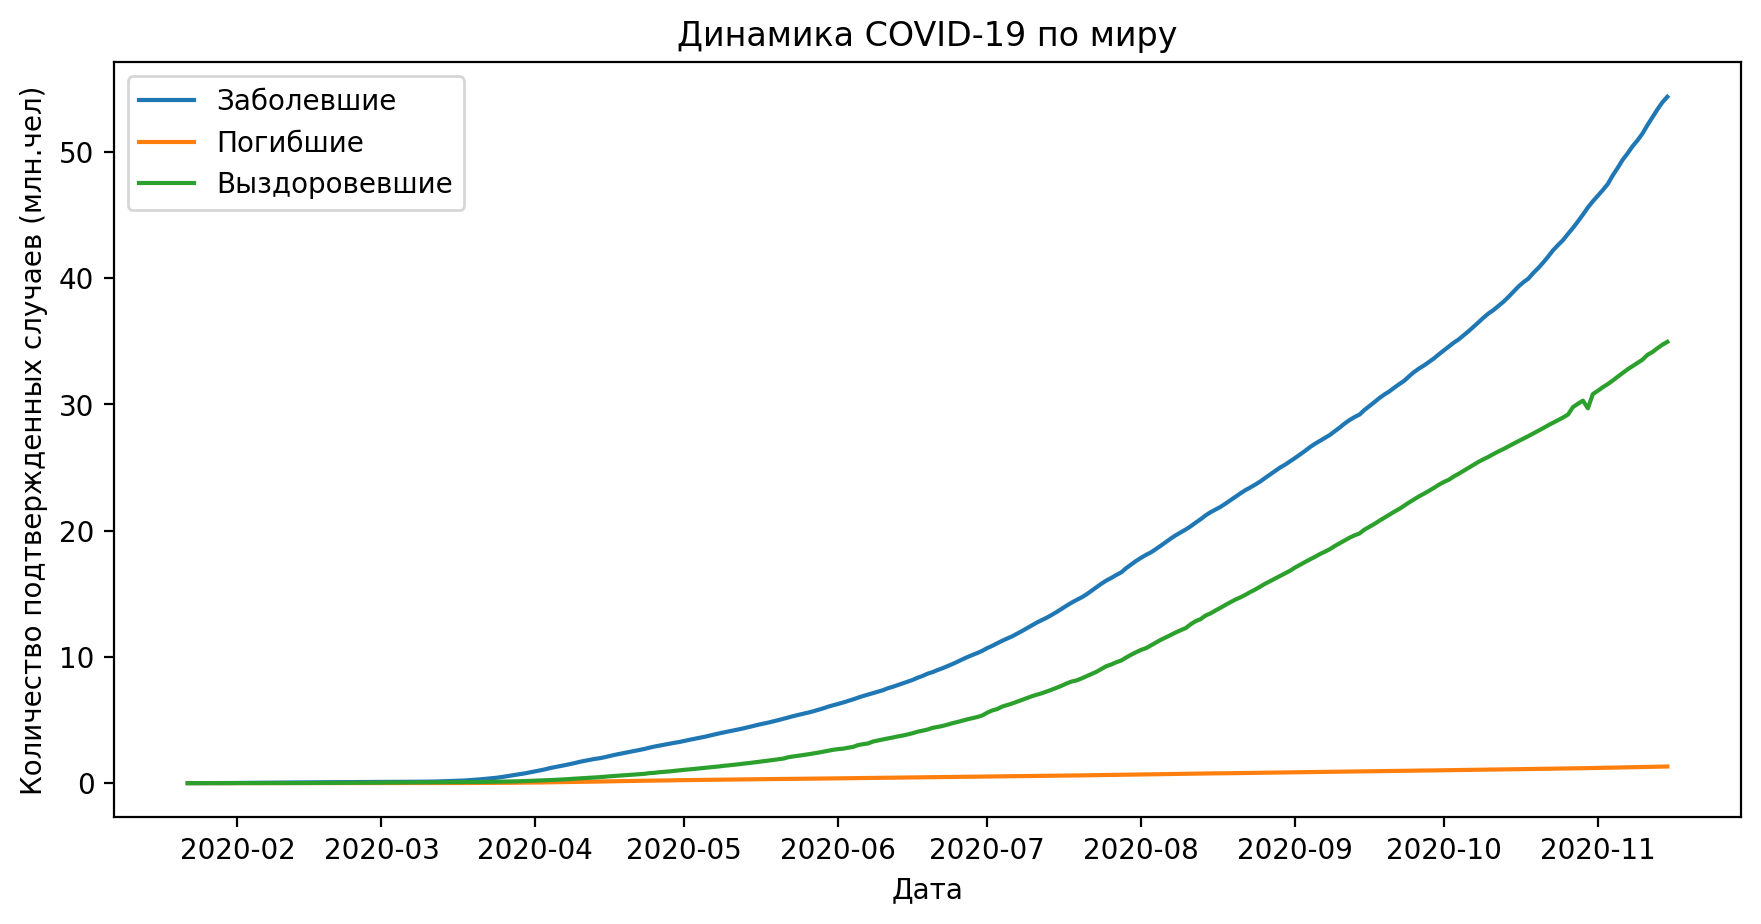

In [85]:
plt.figure(figsize=[10.5, 5.0], dpi=200)

# plt.yscale('log')

plt.plot(df_by_date['Date'], df_by_date['Confirmed'] / 1000000, label='Заболевшие')
plt.plot(df_by_date['Date'], df_by_date['Deaths'] / 1000000, label='Погибшие')
plt.plot(df_by_date['Date'], df_by_date['Recovered'] / 1000000, label='Выздоровевшие')

plt.legend()
plt.title('Динамика COVID-19 по миру')
plt.xlabel('Дата')
plt.ylabel('Количество подтвержденных случаев (млн.чел)')
plt.show()

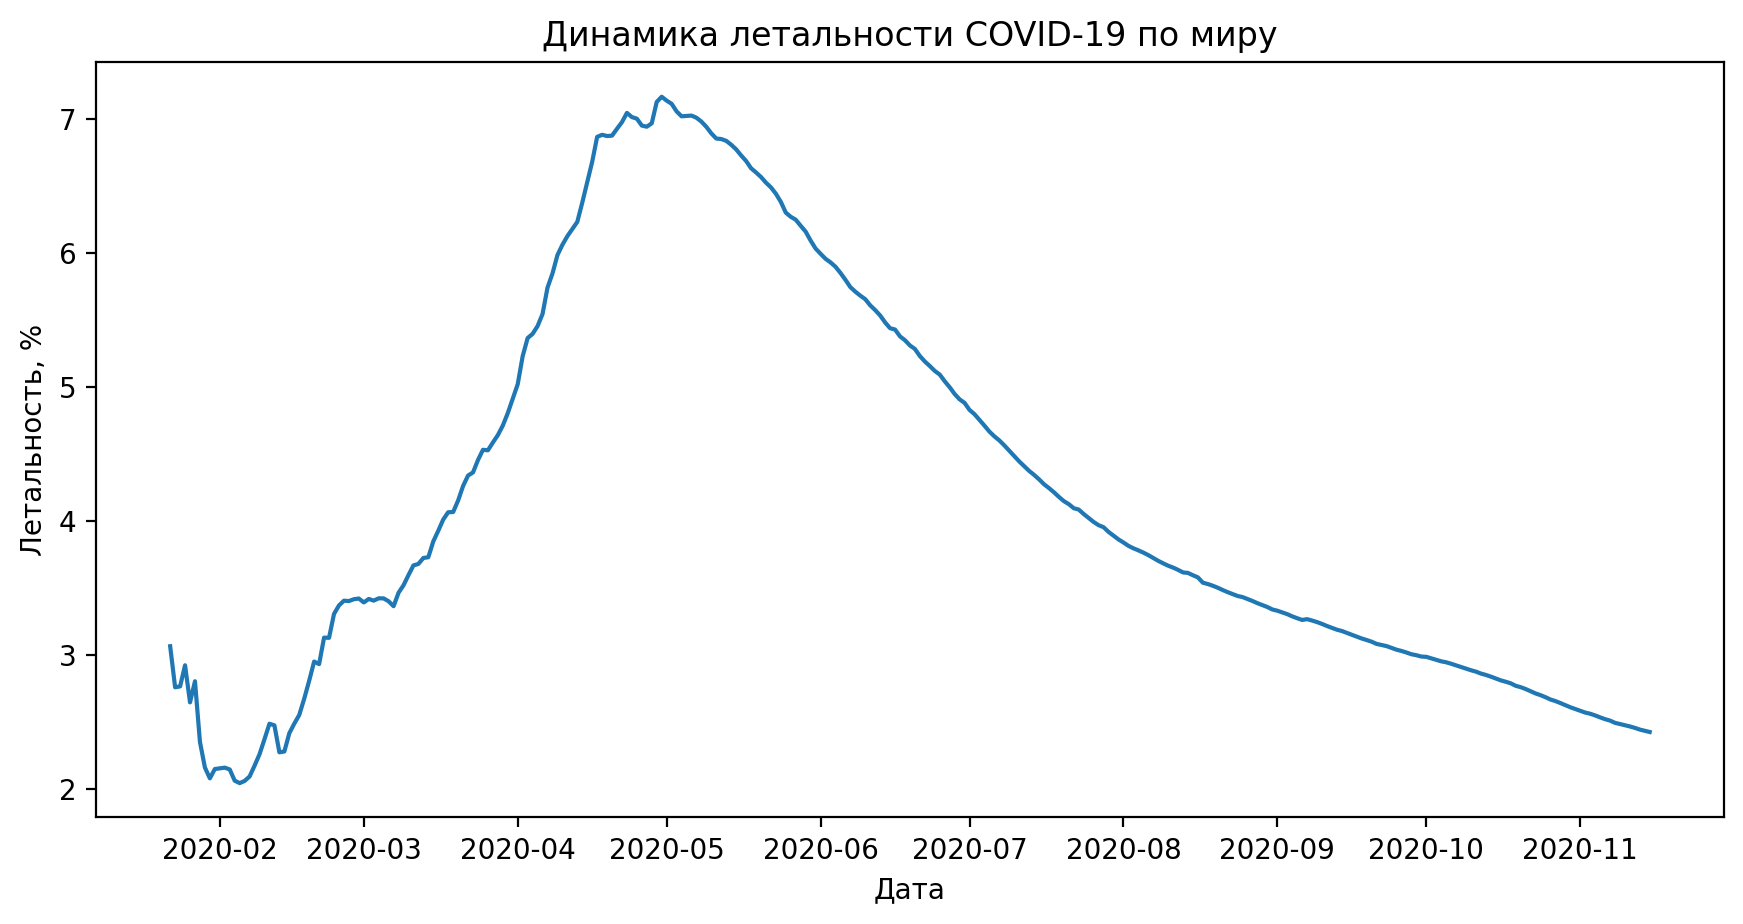

In [88]:
# грубая оценка летальности

plt.figure(figsize=[10.5, 5.0], dpi=200)

lethal_data = (df_by_date['Deaths'] / df_by_date['Confirmed']) * 100

plt.plot(df_by_date['Date'], lethal_data)

plt.title('Динамика летальности COVID-19 по миру')
plt.xlabel('Дата')
plt.ylabel('Летальность, %')

plt.show()

In [90]:
# вычисление новых случаев заболевания

new_cases = []
for idx in range(df_by_date.shape[0]):
    if idx==0:
        new_cases.append(df_by_date['Confirmed'][idx])
    else:
        new_cases.append(df_by_date['Confirmed'][idx] - df_by_date['Confirmed'][idx-1])

new_cases

[555.0,
 98.0,
 288.0,
 497.0,
 680.0,
 809.0,
 2651.0,
 587.0,
 2070.0,
 1690.0,
 2113.0,
 4749.0,
 3094.0,
 4011.0,
 3744.0,
 3182.0,
 3574.0,
 2729.0,
 3030.0,
 2612.0,
 2040.0,
 419.0,
 15148.0,
 6517.0,
 2145.0,
 2194.0,
 2034.0,
 1878.0,
 503.0,
 558.0,
 644.0,
 1756.0,
 386.0,
 585.0,
 845.0,
 982.0,
 1359.0,
 1368.0,
 1889.0,
 2358.0,
 1938.0,
 2535.0,
 2280.0,
 2762.0,
 3914.0,
 4036.0,
 3999.0,
 3747.0,
 5000.0,
 7283.0,
 2478.0,
 16850.0,
 10906.0,
 11348.0,
 14099.0,
 15622.0,
 17747.0,
 27798.0,
 29454.0,
 32382.0,
 32573.0,
 41161.0,
 39679.0,
 49632.0,
 61997.0,
 63700.0,
 67402.0,
 59447.0,
 62249.0,
 75098.0,
 75118.0,
 80698.0,
 82614.0,
 101491.0,
 74707.0,
 72986.0,
 80995.0,
 85008.0,
 84246.0,
 96369.0,
 79795.0,
 75166.0,
 70640.0,
 58872.0,
 79863.0,
 96592.0,
 87544.0,
 77568.0,
 83620.0,
 70880.0,
 76864.0,
 74837.0,
 84925.0,
 101830.0,
 86031.0,
 74729.0,
 70182.0,
 74741.0,
 77488.0,
 62960.0,
 86931.0,
 83566.0,
 79386.0,
 76326.0,
 79636.0,
 92650.0,
 903

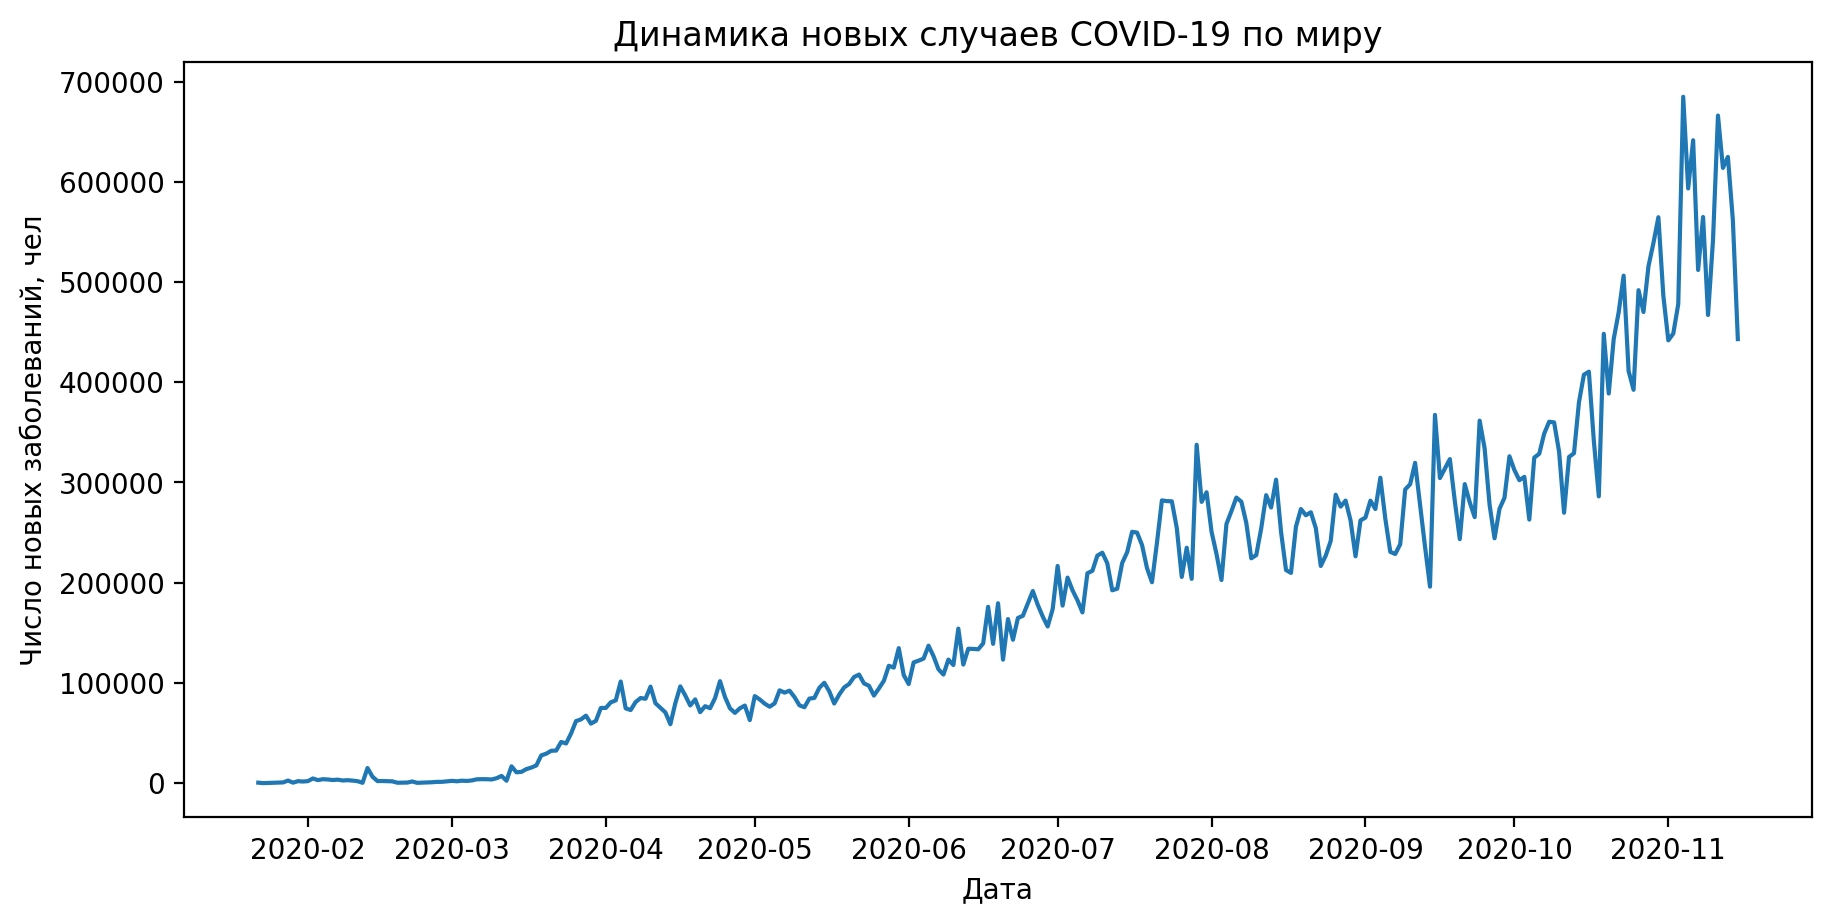

In [92]:
plt.figure(figsize=[10.5, 5.0], dpi=200)

plt.plot(df_by_date['Date'], new_cases)

plt.title('Динамика новых случаев COVID-19 по миру')
plt.xlabel('Дата')
plt.ylabel('Число новых заболеваний, чел')

plt.show()

In [118]:
# динамика по России
# извлечение данных по России 
rus_data = data[data['Country/Region'] == 'Russia']
rus_data 

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date
482,2020-01-31,NaN,Russia,2.0,0.0,0.0,2020-01-31
540,2020-02-01,NaN,Russia,2.0,0.0,0.0,2020-02-01
610,2020-02-02,NaN,Russia,2.0,0.0,0.0,2020-02-02
677,2020-02-03,NaN,Russia,2.0,0.0,0.0,2020-02-03
745,2020-02-04,NaN,Russia,2.0,0.0,0.0,2020-02-04
...,...,...,...,...,...,...,...
156262,2020-11-15,Vologda Oblast,Russia,8853.0,74.0,7369.0,2020-11-15
156264,2020-11-15,Voronezh Oblast,Russia,29653.0,421.0,27698.0,2020-11-15
156278,2020-11-15,Yamalo-Nenets Autonomous Okrug,Russia,23404.0,193.0,16097.0,2020-11-15
156280,2020-11-15,Yaroslavl Oblast,Russia,13713.0,69.0,12470.0,2020-11-15


In [119]:
# rus_data = us_data.dropna()
# rus_data

In [107]:
rus_by_date = rus_data.groupby('Date').sum().reset_index()
rus_by_date

,Date,Confirmed,Deaths,Recovered
0,2020-06-01,414328.0,4849.0,175514.0
1,2020-06-02,423186.0,5031.0,186602.0
2,2020-06-03,431715.0,5208.0,195559.0
3,2020-06-04,440538.0,5376.0,204197.0
4,2020-06-05,449256.0,5520.0,212237.0
...,...,...,...,...
163,2020-11-11,1822345.0,31326.0,1360049.0
164,2020-11-12,1843678.0,31755.0,1378463.0
165,2020-11-13,1865395.0,32156.0,1396851.0
166,2020-11-14,1887836.0,32536.0,1415213.0


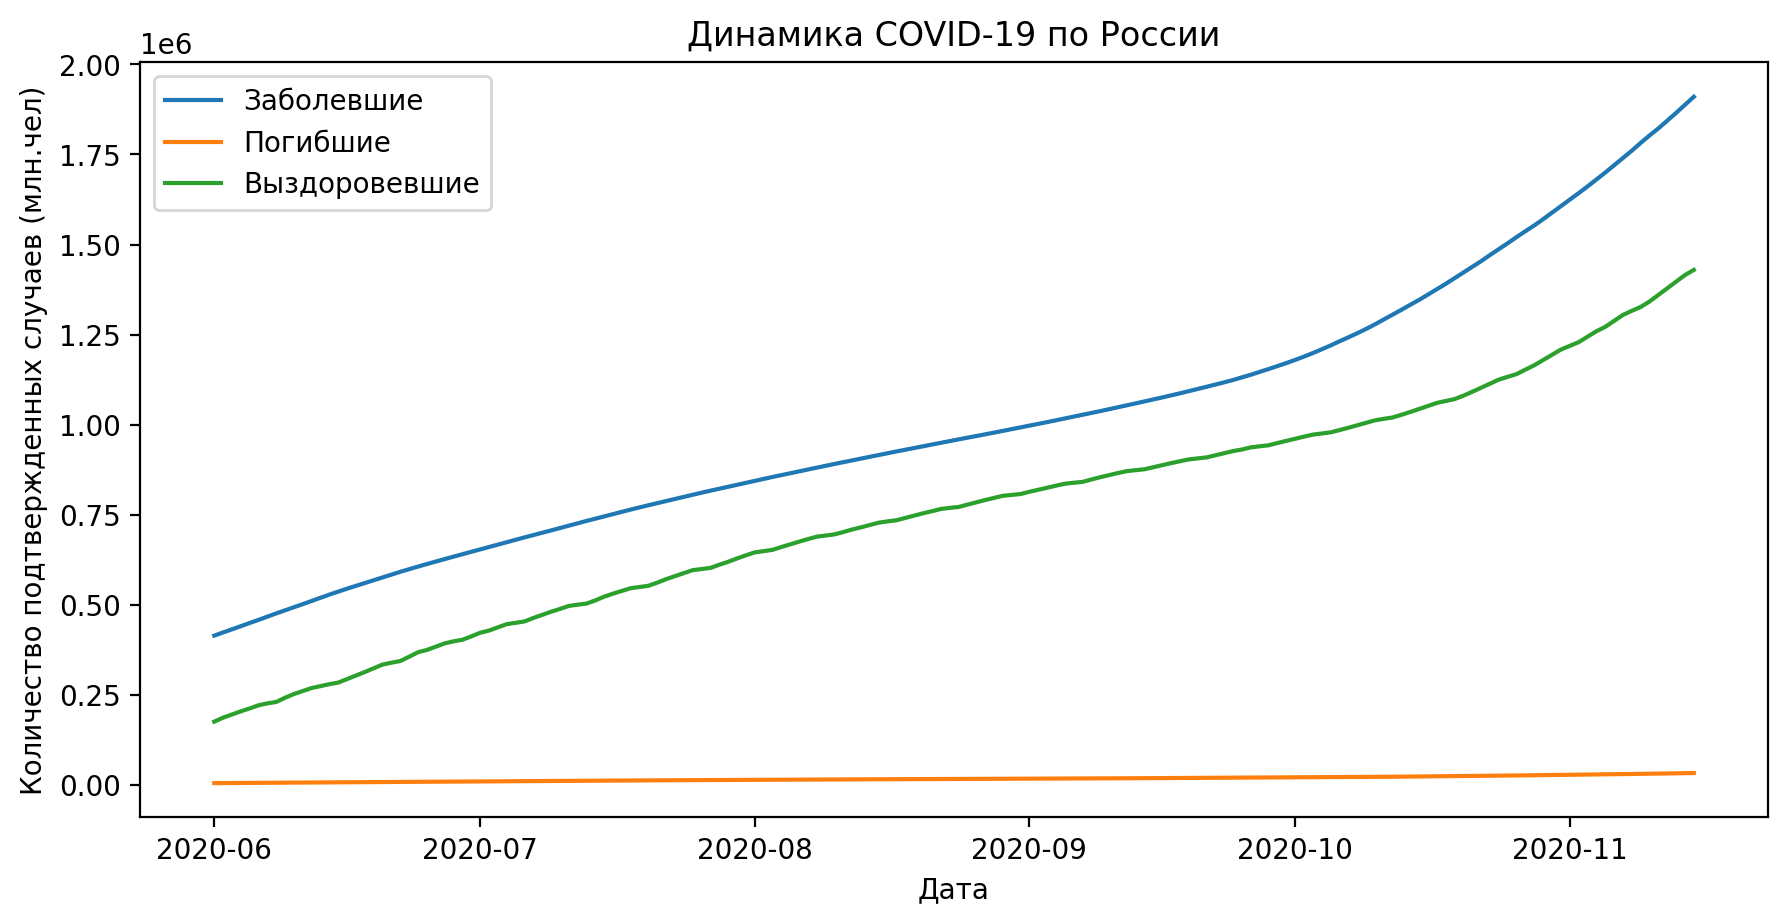

In [117]:
plt.figure(figsize=[10.5, 5.0], dpi=200)

# plt.yscale('log')

plt.plot(rus_by_date['Date'], rus_by_date['Confirmed'], label='Заболевшие')
plt.plot(rus_by_date['Date'], rus_by_date['Deaths'], label='Погибшие')
plt.plot(rus_by_date['Date'], rus_by_date['Recovered'], label='Выздоровевшие')

plt.legend()
plt.title('Динамика COVID-19 по России')
plt.xlabel('Дата')
plt.ylabel('Количество подтвержденных случаев (млн.чел)')
plt.show()

In [120]:
new_cases = []
for idx in range(rus_by_date.shape[0]):
    if idx==0:
        new_cases.append(rus_by_date['Confirmed'][idx])
    else:
        new_cases.append(rus_by_date['Confirmed'][idx] - rus_by_date['Confirmed'][idx-1])

new_cases

[414328.0,
 8858.0,
 8529.0,
 8823.0,
 8718.0,
 8846.0,
 8971.0,
 8970.0,
 8587.0,
 8393.0,
 8777.0,
 8961.0,
 8697.0,
 8809.0,
 8217.0,
 8241.0,
 7824.0,
 7772.0,
 7971.0,
 7870.0,
 7717.0,
 7586.0,
 7413.0,
 7165.0,
 7105.0,
 6788.0,
 6843.0,
 6784.0,
 6683.0,
 6683.0,
 6550.0,
 6752.0,
 6710.0,
 6623.0,
 6719.0,
 6569.0,
 6363.0,
 6534.0,
 6491.0,
 6623.0,
 6586.0,
 6587.0,
 6511.0,
 6240.0,
 6410.0,
 6415.0,
 6389.0,
 6214.0,
 6096.0,
 5901.0,
 5828.0,
 5850.0,
 5830.0,
 5779.0,
 5833.0,
 5741.0,
 5607.0,
 5380.0,
 5449.0,
 5484.0,
 5468.0,
 5429.0,
 5387.0,
 5364.0,
 5121.0,
 5186.0,
 5239.0,
 5191.0,
 5185.0,
 5155.0,
 5081.0,
 4892.0,
 5054.0,
 5017.0,
 5016.0,
 5030.0,
 4911.0,
 4839.0,
 4718.0,
 4790.0,
 4767.0,
 4838.0,
 4860.0,
 4797.0,
 4688.0,
 4639.0,
 4642.0,
 4675.0,
 4758.0,
 4843.0,
 4897.0,
 4932.0,
 4670.0,
 4893.0,
 4958.0,
 5064.0,
 5144.0,
 5097.0,
 5106.0,
 5020.0,
 5172.0,
 5310.0,
 5421.0,
 5406.0,
 5361.0,
 5414.0,
 5435.0,
 5612.0,
 5667.0,
 5803.0,
 5960.0,

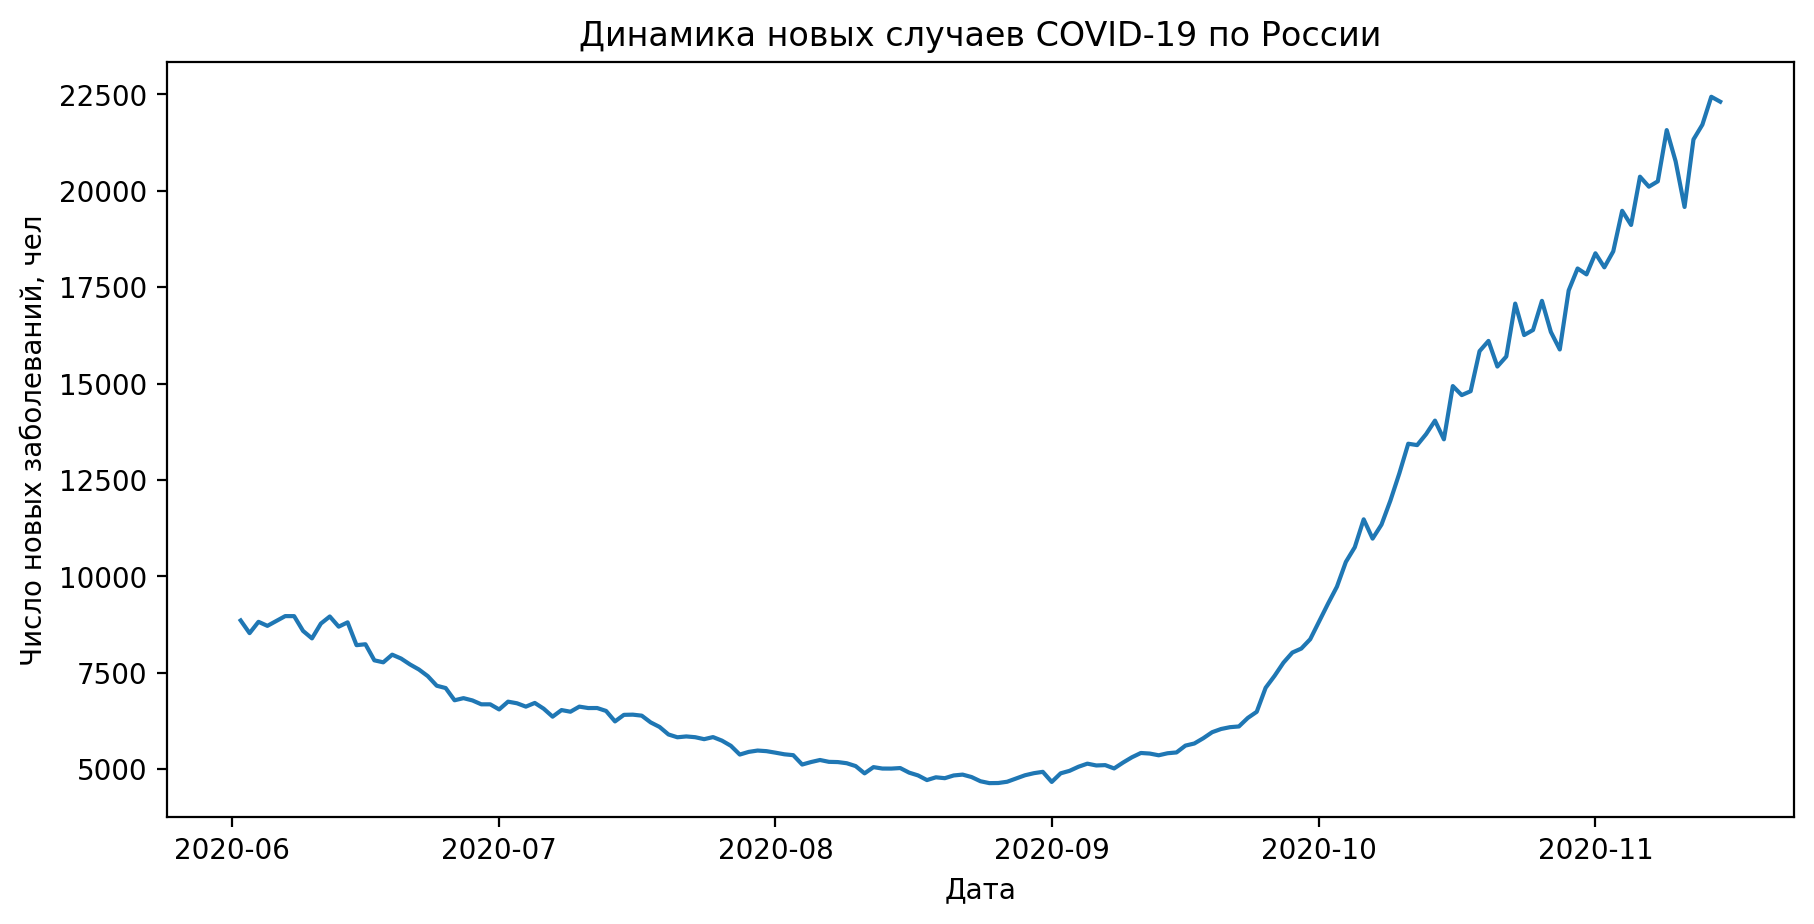

In [121]:
plt.figure(figsize=[10.5, 5.0], dpi=200)

plt.plot(rus_by_date['Date'][1:], new_cases[1:])

plt.title('Динамика новых случаев COVID-19 по России')
plt.xlabel('Дата')
plt.ylabel('Число новых заболеваний, чел')

plt.show()

In [127]:
regions = rus_data['Province/State'].unique()
for region in regions:
    print(region)

nan
Adygea Republic
Altai Krai
Altai Republic
Amur Oblast
Arkhangelsk Oblast
Astrakhan Oblast
Bashkortostan Republic
Belgorod Oblast
Bryansk Oblast
Buryatia Republic
Chechen Republic
Chelyabinsk Oblast
Chukotka Autonomous Okrug
Chuvashia Republic
Dagestan Republic
Ingushetia Republic
Irkutsk Oblast
Ivanovo Oblast
Jewish Autonomous Okrug
Kabardino-Balkarian Republic
Kaliningrad Oblast
Kalmykia Republic
Kaluga Oblast
Kamchatka Krai
Karachay-Cherkess Republic
Karelia Republic
Kemerovo Oblast
Khabarovsk Krai
Khakassia Republic
Khanty-Mansi Autonomous Okrug
Kirov Oblast
Komi Republic
Kostroma Oblast
Krasnodar Krai
Krasnoyarsk Krai
Kurgan Oblast
Kursk Oblast
Leningrad Oblast
Lipetsk Oblast
Magadan Oblast
Mari El Republic
Mordovia Republic
Moscow
Moscow Oblast
Murmansk Oblast
Nenets Autonomous Okrug
Nizhny Novgorod Oblast
North Ossetia - Alania Republic
Novgorod Oblast
Novosibirsk Oblast
Omsk Oblast
Orel Oblast
Orenburg Oblast
Penza Oblast
Perm Krai
Primorsky Krai
Pskov Oblast
Rostov Oblast
R